<a href="https://colab.research.google.com/github/dqdung1604/AI_Sem2_2022-2023/blob/main/AI_W7_2022-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=876aa05a827cf2930726383b06a6a6a0a69ad2a3f98547781df3f9b5f3c4ef2a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


63.35928602250851


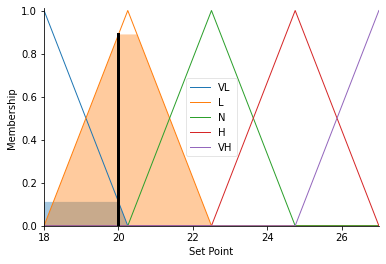

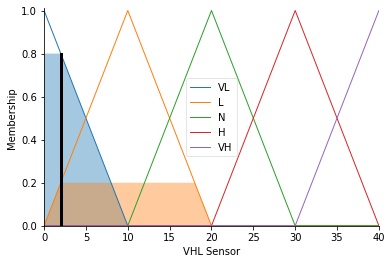

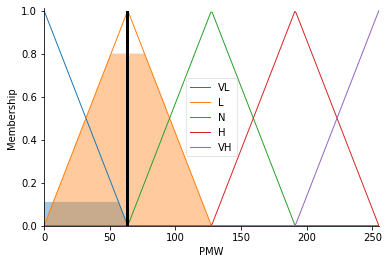

In [ ]:
# Temparature
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

set_point = ctrl.Antecedent(np.arange(18, 27.001, 0.01), 'Set Point')
vhl_sensor = ctrl.Antecedent(np.arange(0, 41, 1), 'VHL Sensor')
pmw = ctrl.Consequent(np.arange(0, 256, 1), 'PMW')

classifyx = ['VL', 'L', 'N', 'H', "VH"]
set_point.automf(names = classifyx)
vhl_sensor.automf(names = classifyx)
pmw.automf(names = classifyx)

rule1 = ctrl.Rule(set_point['VL'] & vhl_sensor['VL'], pmw['VL'])
rule2 = ctrl.Rule(set_point['L'] & vhl_sensor['VL'], pmw['L'])
rule3 = ctrl.Rule(set_point['N'] & vhl_sensor['VL'], pmw['L'])
rule4 = ctrl.Rule(set_point['H'] & vhl_sensor['VL'], pmw['N'])
rule5 = ctrl.Rule(set_point['VH'] & vhl_sensor['VL'], pmw['H'])
rule6 = ctrl.Rule(set_point['VL'] & vhl_sensor['L'], pmw['VL'])
rule7 = ctrl.Rule(set_point['L'] & vhl_sensor['L'], pmw['L'])
rule8 = ctrl.Rule(set_point['N'] & vhl_sensor['L'], pmw['L'])
rule9 = ctrl.Rule(set_point['H'] & vhl_sensor['L'], pmw['N'])
rule10 = ctrl.Rule(set_point['VH'] & vhl_sensor['L'], pmw['H'])
rule11 = ctrl.Rule(set_point['VL'] & vhl_sensor['N'], pmw['L'])
rule12 = ctrl.Rule(set_point['L'] & vhl_sensor['N'], pmw['L'])
rule13= ctrl.Rule(set_point['N'] & vhl_sensor['N'], pmw['N'])
rule14 = ctrl.Rule(set_point['H'] & vhl_sensor['N'], pmw['N'])
rule15 = ctrl.Rule(set_point['VH'] & vhl_sensor['N'], pmw['H'])
rule16 = ctrl.Rule(set_point['VL'] & vhl_sensor['H'], pmw['L'])
rule17 = ctrl.Rule(set_point['L'] & vhl_sensor['H'], pmw['N'])
rule18 = ctrl.Rule(set_point['N'] & vhl_sensor['H'], pmw['H'])
rule19 = ctrl.Rule(set_point['H'] & vhl_sensor['H'], pmw['H'])
rule20 = ctrl.Rule(set_point['VH'] & vhl_sensor['H'], pmw['H'])
rule21 = ctrl.Rule(set_point['VL'] & vhl_sensor['VH'], pmw['N'])
rule22 = ctrl.Rule(set_point['L'] & vhl_sensor['VH'], pmw['H'])
rule23 = ctrl.Rule(set_point['N'] & vhl_sensor['VH'], pmw['H'])
rule24 = ctrl.Rule(set_point['H'] & vhl_sensor['VH'], pmw['VH'])
rule25 = ctrl.Rule(set_point['VH'] & vhl_sensor['VH'], pmw['VH'])

predicting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14,
                                      rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule23, rule24, rule25])
predicting = ctrl.ControlSystemSimulation(predicting_ctrl)
predicting.input['Set Point'] = 20
predicting.input['VHL Sensor'] = 2
predicting.compute()
print(predicting.output['PMW'])

set_point.view(sim = predicting)
vhl_sensor.view(sim = predicting)
pmw.view(sim = predicting)